<a target="_blank" href="https://colab.research.google.com/github/giordamaug/HELP/blob/main/help/notebooks/csegs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://www.kaggle.com/notebooks/welcome?src=https://github.com/giordamaug/HELP/blob/main/help/notebooks/csegs.ipynb">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/>
</a>

# Install HELP from GitHub
Skip this cell if you alread have installed HELP.

In [ ]:
!pip install git+https://github.com/giordamaug/HELP.git

# Download the input files
In this cell we download from GitHub repository the label file and the attribute files. Skip this step if you already have these input files locally.

In [ ]:
!wget -c https://figshare.com/ndownloader/files/43346616 -O CRISPRGeneEffect.csv
!wget -c https://figshare.com/ndownloader/files/43746708 -O Model.csv

# Load the CRISPR data file

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 10)
import os
df_orig = pd.read_csv("CRISPRGeneEffect.csv").rename(columns={'Unnamed: 0': 'gene'}).rename(columns=lambda x: x.split(' ')[0]).set_index('gene').T
print(f'{df_orig.isna().sum().sum()} NaN over {len(df_orig)*len(df_orig.columns)} values')
df_orig

739493 NaN over 20287300 values


gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,...,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,...,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,...,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,...,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,...,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,...,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,...,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,...,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,...,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,...,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


# Load the map between cell lines and tissues

In this code we load the file that maps cell-lines identifiers (column `ModelID`) to tissue, disease or tumor type (respectively: `OncotreeLineage`,  `OncotreePrimaryDisease`,	`OncotreeSubtype`). As a second step, we print the counts of lines for each tissue.

In [2]:
df_map = pd.read_csv("Model.csv")
print(df_map[['OncotreeLineage']].value_counts())
df_map

OncotreeLineage          
Lung                         249
Lymphoid                     211
CNS/Brain                    122
Skin                         120
Esophagus/Stomach             95
Breast                        94
Bowel                         89
Head and Neck                 84
Bone                          77
Myeloid                       77
Ovary/Fallopian Tube          75
Kidney                        73
Pancreas                      66
Peripheral Nervous System     56
Soft Tissue                   55
Biliary Tract                 44
Uterus                        41
Fibroblast                    41
Bladder/Urinary Tract         39
Normal                        39
Pleura                        35
Liver                         29
Cervix                        25
Eye                           21
Thyroid                       18
Prostate                      15
Testis                         7
Vulva/Vagina                   5
Muscle                         5
Ampulla of Vater 

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,...,PublicComments,WTSIMasterCellID,SangerModelID,COSMICID,LegacySubSubtype
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,...,NaN,2201.0,SIDM00105,905933.0,high_grade_serous
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,...,NaN,55.0,SIDM00829,905938.0,M3
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,...,NaN,NaN,SIDM00891,NaN,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,...,NaN,783.0,SIDM00594,907053.0,M6
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,...,NaN,NaN,SIDM00593,NaN,M6
...,...,...,...,...,...,...,...,...,...,...,...
1916,ACH-003157,PT-QDEP9D,ABM-T0822,ABMT0822,ZIMMMPLC,...,NaN,NaN,NaN,NaN,NaN
1917,ACH-003158,PT-nszsxG,ABM-T9220,ABMT9220,ZIMMSMCI,...,NaN,NaN,NaN,NaN,NaN
1918,ACH-003159,PT-AUxVvV,ABM-T9233,ABMT9233,ZIMMRSCH,...,NaN,NaN,NaN,NaN,NaN
1919,ACH-003160,PT-AUxVvV,ABM-T9249,ABMT9249,ZIMMGMCH,...,NaN,NaN,NaN,NaN,NaN


# Common Egs (pan-tissue labelling)
We can apply the labelling algorithm to all cell lines present in the CRISPR data file to compute the common essential genes, i.e. the *pan-tissue* (or pan-cancer, pan-disease, etc). This set of labels will be used in the following to get the context-specific essential genes for single tissue.

### Ignoring in Model tissue with few cell-lines
in this code we select in the CRISPR data file only cell lines belonging to tissue reported in the Model such that the number of lines is greater (or equal) to a specific amount.

In [3]:
from help.utility.selection import filter_crispr_by_model
df = filter_crispr_by_model(df_orig, df_map, minlines=10, line_group='OncotreeLineage')
df

gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,...,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,...,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,...,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,...,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,...,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,...,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,...,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,...,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,...,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,...,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


### labelling EGs across tissues
In this example we compute common EGs by applying the labelling algorithm within each tissue-specufic cell lines. Then the common essentiality label is computed by making the mode of previously-computed labels across tissue.
In order to do that, we with need to select cell-lines form the `Model.csv` as a nested list of lists of cell-lines. THis is
obtained by properly calling the `select-cell-Lines` function.


In [4]:
from help.utility.selection import select_cell_lines, delrows_with_nan_percentage
from help.models.labelling import labelling
cell_lines = select_cell_lines(df, df_map, tissue_list='all', nested=True)
print(f"Selecting {len(cell_lines)} tissue for a total of {sum([len(x) for x in cell_lines])} cell-lines")

Selecting 24 tissue for a total of 1091 cell-lines


Once selected the tissues as a nested list of cell-lines, we can apply the labelling algorithm with the following coee. Note that we remove from the CRIPSR matrix those genes with a percentage of missing values greater than 80%.

In [5]:
from help.utility.selection import delrows_with_nan_percentage
from help.models.labelling import labelling
# remove rows with all nans
df_nonan = delrows_with_nan_percentage(df, perc=80)
df_label = labelling(df_nonan, columns=cell_lines, n_classes=2, labelnames={1: 'NE', 0: 'E'},
                     mode='flat-multi', algorithm='otsu')
df_label.to_csv("label_PanTissue_group.csv")
df_label.value_counts(), f"Nan: {df_label['label'].isna().sum()}"

Removed 512 rows from 18443 with at least 80% NaN


100%|██████████| 34/34 [00:00<00:00, 260.19it/s]
/usr/local/lib/python3.10/dist-packages/help/models/labelling.py:239: UserWarning: There are rows with all NaNs, please remove them using the function 'rows_with_all_nan()' and re-apply the labelling. Otherwise you will have NaN labels in your output.
  warnings.warn("There are rows with all NaNs, please remove them using the function 'rows_with_all_nan()' and re-apply the labelling. Otherwise you will have NaN labels in your output.")
100%|██████████| 86/86 [00:00<00:00, 432.36it/s]
/usr/local/lib/python3.10/dist-packages/help/models/labelling.py:239: UserWarning: There are rows with all NaNs, please remove them using the function 'rows_with_all_nan()' and re-apply the labelling. Otherwise you will have NaN labels in your output.
  warnings.warn("There are rows with all NaNs, please remove them using the function 'rows_with_all_nan()' and re-apply the labelling. Otherwise you will have NaN labels in your output.")
100%|██████████| 65/65

(label
 NE       16681
 E         1250
 dtype: int64,
 'Nan: 0')

For comparison, let's compute the common EGs by applying the labelling to all tissue in a flat way. In this case all cell-lines contribute in the same way to the labelling criterium regardless of the related tissue.

In [6]:
from help.utility.selection import select_cell_lines, delrows_with_nan_percentage
from help.models.labelling import labelling
cell_lines = select_cell_lines(df, df_map, tissue_list='all', nested=False)
print(f"Selecting {len([len(x) for x in cell_lines])} cell-lines")

Selecting 1091 cell-lines


Once selected all cell-lines as a flat list of identifiers, we can apply the labelling algorithm with the following code. Also in this case we remove from the CRIPSR matrix those genes with a percentage of missing values greater than 80%.

In [9]:
from help.utility.selection import delrows_with_nan_percentage
from help.models.labelling import labelling
# remove rows with all nans
df_nonan = delrows_with_nan_percentage(df, perc=80)
df_label = labelling(df_nonan, columns=cell_lines, n_classes=2,
                     labelnames={1: 'NE', 0: 'E'},
                     mode='flat-multi', algorithm='otsu')
df_label.to_csv("label_PanTissue.csv")
df_label.value_counts(), f"Nan: {df_label['label'].isna().sum()}"

Removed 512 rows from 18443 with at least 80% NaN


100%|██████████| 1091/1091 [00:02<00:00, 372.72it/s]


(label
 NE       16668
 E         1263
 dtype: int64,
 'Nan: 0')

# Context specific EGs
In this section we make the difference between pan-tissue EGs (common EGs) and tissue EGs to get the context-specific EGs for the tissue (csEGs). The EGs for Kidney and Lung tissues (previously generated) are loaded from csv data files (downloaded from the GitHub repository).
In this forst code/plot we show the csEGs of Lung and Kidney by subtracting the common EGs computed by grouping tissue cell-lines (`label_PanTissue_group.csv`). In the second code/plot we show the csEGs of the two tissues by subtracting the common EGs computed on all cell-lines in flat mode (`label_PanTissue.csv`)

In [13]:
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_HELP.csv
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Lung_HELP.csv

--2024-03-08 12:02:24--  https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_HELP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180249 (176K) [text/plain]
Saving to: ‘Kidney_HELP.csv.1’


Kidney_HELP.csv.1     0%[                    ]       0  --.-KB/s               
Kidney_HELP.csv.1   100%[===================>] 176.02K  --.-KB/s    in 0.03s   

2024-03-08 12:02:24 (6.74 MB/s) - ‘Kidney_HELP.csv.1’ saved [180249/180249]

--2024-03-08 12:02:24--  https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Lung_HELP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

/Users/maurizio/HELP/help/datafinal
Subtracting 1250 common EGs...
Overlapping of 7 genes between ['Kidney', 'Lung']
60 genes only in Kidney
64 genes only in Lung


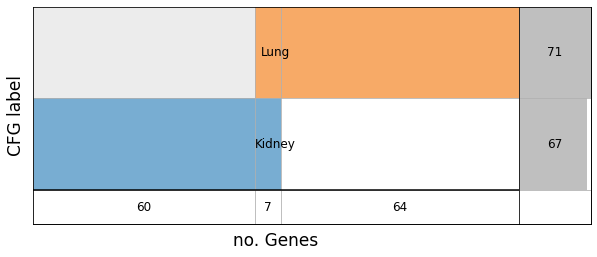

In [3]:
%cd ../datafinal 
import pandas as pd
from help.utility.selection import EG_tissues_intersect
csEGs, overlap, diffs = EG_tissues_intersect(tissues = {'Kidney': pd.read_csv("Kidney_HELP_3classes.csv", index_col=0),
                                                        'Lung': pd.read_csv("Lung_HELP_3classes.csv", index_col=0)
                                                       },
                        common_df = pd.read_csv("../data/PanTissue_group_HELP.csv", index_col=0),
                        display=True, verbose=True)

Overlapping of 1175 genes between ['Kidney', 'Lung']
89 genes only in Kidney
106 genes only in Lung


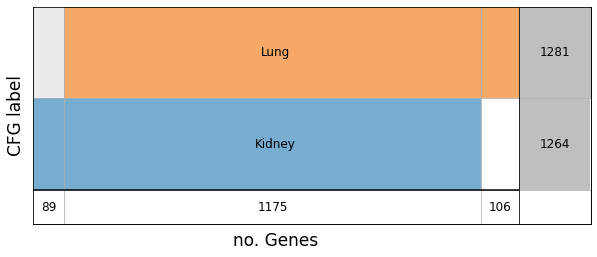

In [4]:
from help.utility.selection import EG_tissues_intersect
csEGs, overlap, diffs = EG_tissues_intersect(tissues = {'Kidney': pd.read_csv("Kidney_HELP_3classes.csv", index_col=0),
                                                        'Lung': pd.read_csv("Lung_HELP_3classes.csv", index_col=0)
                                                       },
                        #common_df = pd.read_csv(os.path.join(datapath, "PanTissue_group_HELP.csv"), index_col=0),
                        display=True, verbose=True)

As we ca see, the overlapping of cdEgs between the two tissues differs in two genes. Then we save the csEGs into a file (the last one).

In [16]:
with open("csEG_Kidney.txt", 'w', encoding='utf-8') as f:
    f.write('\n'.join(list(csEGs['Kidney'])))
with open("csEG_Lung.txt", 'w', encoding='utf-8') as f:
    f.write('\n'.join(list(csEGs['Lung'])))

/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_23629/980184405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = price, y = labels, ax=ax, palette = sns.color_palette("pastel"))
/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_23629/980184405.py:7: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x = price, y = labels, ax=ax, palette = sns.color_palette("pastel"))


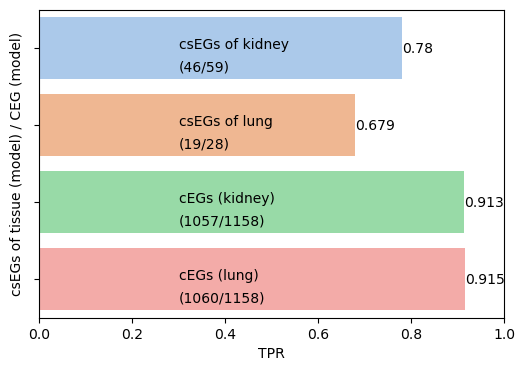

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['csEGs of kidney', 'csEGs of lung', 'cEGs (kidney)', 'cEGs (lung)']
tpr = ['46/59', '19/28', '1057/1158', '1060/1158']
price = [0.780, 0.679, 0.913, 0.915]
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x = price, y = labels, ax=ax, palette = sns.color_palette("pastel"))
ax.set_xlim(0,1)
ax.set_xlabel('TPR')
ax.set_ylabel('csEGs of tissue (model) / CEG (model)')
ax.set(yticklabels=[])
for i,l,t in zip(range(4),labels,tpr):
    ax.text(0.3, i * 1.0, l)
    ax.text(0.3, (i * 1.0) + 0.3, f"({t})")
for i in ax.containers:
    ax.bar_label(i,)



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
x = ['Kidney', 'Lung']
y = [0.75, 0.77]
sns.barplot(x, y, color = 'blue', palette = 'hls')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given